INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


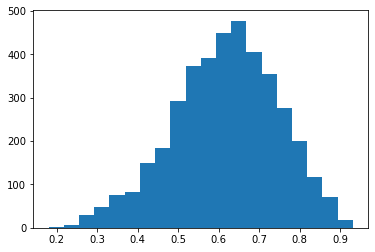

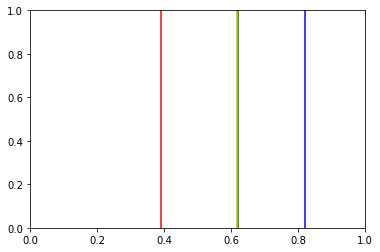

In [8]:
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# creating the dataset
samples = {
 "N" : 11,
 "y" : [0,0,0,0,1,1,1,1,1,1,1]
}

# creating the model
bernModel = CmdStanModel(stan_file=r'bern_1.stan')

# performing sampling
bernModel_sampled = bernModel.sample(data=samples, output_dir='.')

# extracting theta variable
theta = bernModel_sampled.stan_variable('theta')

# histogram
plt.hist(theta, bins = 20), plt.show()

# mean, median, 5% and 95% quantiles of theta
summary = bernModel_sampled.summary()
plt.axvline(summary['5%']['theta'], color='r')
plt.axvline(summary['50%']['theta'], color='g')
plt.axvline(summary['95%']['theta'], color='b')
plt.axvline(theta.mean(), color='y')
plt.show()